# Programa 1

- Vazquez Sanchez Erick Alejandro

In [93]:
# Instalamos las librerias necesarias
%pip install scikit-learn
%pip install matplotlib
%pip install pandas
%pip install imblearn
%pip install imbalanced-learn
%pip install

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


## Preprocesamiento de los datos

In [94]:
import pandas as pd

In [95]:
email_test = pd.read_csv('./fraud_email_train.csv')
email_train = pd.read_csv('./fraud_email_test.csv')

C:\Users\erick\AppData\Local\Temp\ipykernel_4832\3071543590.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  email_test = pd.read_csv('./fraud_email_train.csv')
C:\Users\erick\AppData\Local\Temp\ipykernel_4832\3071543590.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  email_train = pd.read_csv('./fraud_email_test.csv')


In [96]:
# Regresa las primeras n filas, n por defecto vale 5
email_train.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,kuykendall-t,<2493562.1075863265306.JavaMail.evans@thyme>,"Fri, 2 Nov 2001 09:06:13 -0800 (PST)",tori.kuykendall@enron.com,martin.cuilla@enron.com,free agency,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,d25f83c160a5980a830280b3549bcff7bd6d1c57d3119e264e5cf05d13366354,False,False,Internal,315.0,False,False,0
1,maildir,rodrique-r,<16766317.1075858344871.JavaMail.evans@thyme>,"Wed, 13 Sep 2000 11:17:00 -0700 (PDT)",robin.rodrigue@enron.com,pallen70@hotmail.com,9/13,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,a75bbfaafc2667c658aae7d01e49f15efd5e528fb83cb47f58f8ea74f7c9b886,False,False,Internal,728.0,False,False,0
2,maildir,dasovich-j,<14602780.1075843196219.JavaMail.evans@thyme>,"Fri, 6 Oct 2000 02:55:00 -0700 (PDT)",jeff.dasovich@enron.com,james.steffes@enron.com,Re: Rebecca Smith,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,b1d36ddfd2e2406ee4033f742fb7030d113e7e29132591791d0f505c772fccff,False,False,Internal,5486.0,False,False,0
3,maildir,grigsby-m,<28242010.1075855592756.JavaMail.evans@thyme>,"Mon, 26 Mar 2001 15:01:00 -0800 (PST)",mike.grigsby@enron.com,anne.bike@enron.com,CIG and WIC,1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,f162c2a145cb1c3fac1793bd30e93f86f9734db9e249c1ec3b390b4bedac756b,False,False,Internal,668.0,False,False,0
4,maildir,shackleton-s,<7188760.1075844535973.JavaMail.evans@thyme>,"Mon, 10 Jan 2000 05:57:00 -0800 (PST)",sara.shackleton@enron.com,mark.taylor@enron.com,"Eye doctor - 8:15 am on Tuesday, Jan. 11",1.0,text/plain; charset=us-ascii,7bit,...,,Enron Data,b1d82c4b962cb81acc5736028321a8f010de3266c07d9896435ff5b5ef1ce316,False,False,Internal,4430.0,False,False,0


In [97]:
email_train.columns

Index(['Folder-User', 'Folder-Name', 'Message-ID', 'Date', 'From', 'To',
       'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding',
       'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'Body', 'Cc', 'Bcc', 'Time', 'Attendees', 'Re', 'Source', 'Mail-ID',
       'POI-Present', 'Suspicious-Folders', 'Sender-Type',
       'Unique-Mails-From-Sender', 'Low-Comm', 'Contains-Reply-Forwards',
       'Label'],
      dtype='object')

## Caracteristicas principales

Vamos a quitar las caracteristicas menos significativas de los datos:
- Folder-User
- Folder-Name
- Message-ID
- Mime-Version
- Content-Transfering-Encoding
- X-From
- X-To
- X-cc
- X-bcc
- X-Folder
- X-Origin
- X-Filename
- Source
- Mail-ID
- Time
- Attendees
- Re
- PIO-Present

Las caracteristicas sobrantes:
- From, To, Cc, Bcc: Información sobre los remitentes y destinatarios.
- Subject: Asunto del correo
- Body: Contenido del correo
- Contains-Reply-Forwards: Podría ser útil dependiendo de si las respuestas o reenvíos son una característica de los correos spam.
- Label: Etiqueta que indica si es span o no.
- Suspicious-Folder
- Low-Comm: indica la frecuencia de comunicacion con el remitente.

In [98]:
datos_seleccionados_train = email_train[['From', 'To', 'Cc', 'Bcc', 'Subject', 'Body', 'Content-Type', 'Contains-Reply-Forwards', 'Suspicious-Folders', 'Low-Comm', 'Sender-Type', 'Label']]
datos_seleccionados_test = email_test[['From', 'To', 'Cc', 'Bcc', 'Subject', 'Body', 'Content-Type', 'Contains-Reply-Forwards', 'Suspicious-Folders', 'Low-Comm', 'Sender-Type', 'Label']]

datos_seleccionados_train.head()

,From,To,Cc,Bcc,Subject,Body,Content-Type,Contains-Reply-Forwards,Suspicious-Folders,Low-Comm,Sender-Type,Label
0,tori.kuykendall@enron.com,martin.cuilla@enron.com,,,free agency,free agency i would like to bid 5 points on jay fiedler,text/plain; charset=us-ascii,False,False,False,Internal,0
1,robin.rodrigue@enron.com,pallen70@hotmail.com,,,9/13,9/13 Have a good evening. Robin,text/plain; charset=us-ascii,False,False,False,Internal,0
2,jeff.dasovich@enron.com,james.steffes@enron.com,"['karen.denne@enron.com', 'mpalmer@enron.com', 'rshapiro@enron.com', 'skean@enron.com']","karen.denne@enron.com, mpalmer@enron.com, rshapiro@enron.com, \n\tskean@enron.com",Re: Rebecca Smith,"Agree completely. Notion I had was that we give Rebecca the slides, tell her the story on background, then she trots off to interview McNeally, Ellison, etc. Just a thought. Might be easier, faster channel that achieves the quick action/message we're looking for. James D Steffes 10/05/2000 08:30 PM",text/plain; charset=us-ascii,False,False,False,Internal,0
3,mike.grigsby@enron.com,anne.bike@enron.com,,,CIG and WIC,"Please write up a ticket transferring my CIG and WIC April physical positions to IM denver. I will be selling CIG index to Jay at CIG index flat and buying the 2000/d at CIG index minus .03. Also, run a report of all my term index positions at CIG and WIC for the summer, so that we can transfer these to Jay as well. Thanks, Mike",text/plain; charset=us-ascii,False,False,False,Internal,0
4,sara.shackleton@enron.com,mark.taylor@enron.com,kaye.ellis@enron.com,kaye.ellis@enron.com,"Eye doctor - 8:15 am on Tuesday, Jan. 11","Eye doctor 8:15 am on Tuesday, Jan. 11 I shouldn't be too late. ss",text/plain; charset=us-ascii,False,False,False,Internal,0


- Conteo de clases

In [99]:
datos_seleccionados_train['Label'].value_counts()

Label
0    89017
1      467
Name: count, dtype: int64

C:\Users\erick\AppData\Local\Temp\ipykernel_4832\2385600244.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(datos_seleccionados_train['Label'], sort=True)


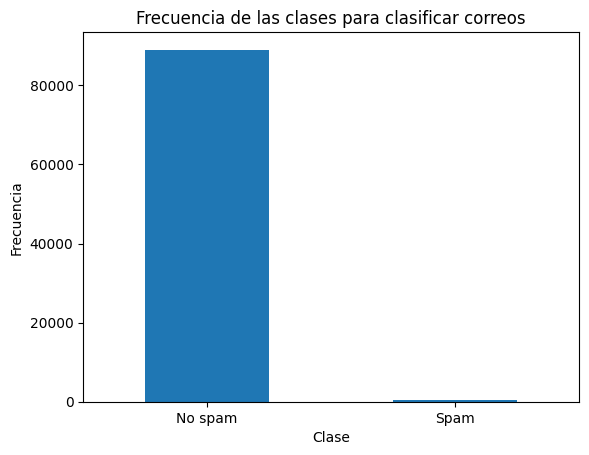

In [100]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(datos_seleccionados_train['Label'], sort=True)

count_classes.plot(kind='bar', rot=0)

plt.xticks(range(2), ['No spam', 'Spam'])
plt.title("Frecuencia de las clases para clasificar correos")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")

# Mostrar la gráfica
plt.show()


In [101]:
import re

def limpiar_texto(texto):
  return re.sub(r"[\'\[\],\n\t]", "", texto).strip()

datos_seleccionados_train['Cc'] = datos_seleccionados_train['Cc'].apply(limpiar_texto)
datos_seleccionados_train['Bcc'] = datos_seleccionados_train['Bcc'].apply(limpiar_texto)
datos_seleccionados_test['Cc'] = datos_seleccionados_test['Cc'].apply(limpiar_texto)
datos_seleccionados_test['Bcc'] = datos_seleccionados_test['Bcc'].apply(limpiar_texto)


C:\Users\erick\AppData\Local\Temp\ipykernel_4832\553437756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados_train['Cc'] = datos_seleccionados_train['Cc'].apply(limpiar_texto)
C:\Users\erick\AppData\Local\Temp\ipykernel_4832\553437756.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados_train['Bcc'] = datos_seleccionados_train['Bcc'].apply(limpiar_texto)
C:\Users\erick\AppData\Local\Temp\ipykernel_4832\553437756.py:8: SettingWithCopyWarning: 
A value is trying to be 

In [102]:
# Concatenar un prefijo a los valores de cada columna
datos_seleccionados_train['Contains-Reply-Forwards'] = 'CRF_' + datos_seleccionados_train['Contains-Reply-Forwards'].astype('str')
datos_seleccionados_train['Suspicious-Folders'] = 'SF_' + datos_seleccionados_train['Suspicious-Folders'].astype('str')
datos_seleccionados_train['Low-Comm'] = 'LC_' + datos_seleccionados_train['Low-Comm'].astype('str')
datos_seleccionados_train['From'] = 'From_' + datos_seleccionados_train['From']
datos_seleccionados_train['To'] = 'To_' + datos_seleccionados_train['To']
# datos_seleccionados_train['Cc'] = 'Cc_' + datos_seleccionados_train['Cc']
# datos_seleccionados_train['Bcc'] = 'Bcc_' + datos_seleccionados_train['Bcc']




datos_seleccionados_test['Contains-Reply-Forwards'] = 'CRF_' + datos_seleccionados_test['Contains-Reply-Forwards'].astype('str')
datos_seleccionados_test['Suspicious-Folders'] = 'SF_' + datos_seleccionados_test['Suspicious-Folders'].astype('str')
datos_seleccionados_test['Low-Comm'] = 'LC_' + datos_seleccionados_test['Low-Comm'].astype('str')
datos_seleccionados_test['From'] = 'From_' + datos_seleccionados_test['From']
datos_seleccionados_test['To'] = 'To_' + datos_seleccionados_test['To']
# datos_seleccionados_test['Cc'] = 'Cc_' + datos_seleccionados_test['Cc']
# datos_seleccionados_test['Bcc'] = 'Bcc_' + datos_seleccionados_test['Bcc']

# Mostrar los primeros registros
datos_seleccionados_train.head()

C:\Users\erick\AppData\Local\Temp\ipykernel_4832\3539023373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados_train['Contains-Reply-Forwards'] = 'CRF_' + datos_seleccionados_train['Contains-Reply-Forwards'].astype('str')
C:\Users\erick\AppData\Local\Temp\ipykernel_4832\3539023373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados_train['Suspicious-Folders'] = 'SF_' + datos_seleccionados_train['Suspicious-Folders'].astype('str')
C:\Users\erick\AppData\Local\Temp\ipy

,From,To,Cc,Bcc,Subject,Body,Content-Type,Contains-Reply-Forwards,Suspicious-Folders,Low-Comm,Sender-Type,Label
0,From_tori.kuykendall@enron.com,To_martin.cuilla@enron.com,,,free agency,free agency i would like to bid 5 points on jay fiedler,text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0
1,From_robin.rodrigue@enron.com,To_pallen70@hotmail.com,,,9/13,9/13 Have a good evening. Robin,text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0
2,From_jeff.dasovich@enron.com,To_james.steffes@enron.com,karen.denne@enron.com mpalmer@enron.com rshapiro@enron.com skean@enron.com,karen.denne@enron.com mpalmer@enron.com rshapiro@enron.com skean@enron.com,Re: Rebecca Smith,"Agree completely. Notion I had was that we give Rebecca the slides, tell her the story on background, then she trots off to interview McNeally, Ellison, etc. Just a thought. Might be easier, faster channel that achieves the quick action/message we're looking for. James D Steffes 10/05/2000 08:30 PM",text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0
3,From_mike.grigsby@enron.com,To_anne.bike@enron.com,,,CIG and WIC,"Please write up a ticket transferring my CIG and WIC April physical positions to IM denver. I will be selling CIG index to Jay at CIG index flat and buying the 2000/d at CIG index minus .03. Also, run a report of all my term index positions at CIG and WIC for the summer, so that we can transfer these to Jay as well. Thanks, Mike",text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0
4,From_sara.shackleton@enron.com,To_mark.taylor@enron.com,kaye.ellis@enron.com,kaye.ellis@enron.com,"Eye doctor - 8:15 am on Tuesday, Jan. 11","Eye doctor 8:15 am on Tuesday, Jan. 11 I shouldn't be too late. ss",text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0


In [103]:
len(datos_seleccionados_train)

89484

In [104]:
# Quitamos duplicados donde el asunto y el contenido sea el mismo
datos_seleccionados_train = datos_seleccionados_train.drop_duplicates(subset=['From', 'Subject', 'Body'])
datos_seleccionados_test = datos_seleccionados_test.drop_duplicates(subset=['From', 'Subject', 'Body'])

In [105]:
len(datos_seleccionados_train)

77458

In [106]:
# Juntamos el asunto y el body
datos_seleccionados_train['clean_text'] = datos_seleccionados_train['Subject'] + ' ' + datos_seleccionados_train['Body'] + ' ' + datos_seleccionados_train['Content-Type'] 
datos_seleccionados_test['clean_text'] = datos_seleccionados_test['Subject'] + ' ' + datos_seleccionados_test['Body'] + ' ' + datos_seleccionados_train['Content-Type'] 

In [107]:
datos_seleccionados_train = datos_seleccionados_train.reset_index(drop=True)
datos_seleccionados_test = datos_seleccionados_test.reset_index(drop=True)

In [108]:
import string

In [109]:
datos_seleccionados_train['clean_text'] = datos_seleccionados_train['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

datos_seleccionados_test['clean_text'] = datos_seleccionados_test['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

datos_seleccionados_train.head()

,From,To,Cc,Bcc,Subject,Body,Content-Type,Contains-Reply-Forwards,Suspicious-Folders,Low-Comm,Sender-Type,Label,clean_text
0,From_tori.kuykendall@enron.com,To_martin.cuilla@enron.com,,,free agency,free agency i would like to bid 5 points on jay fiedler,text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0,free agency free agency i would like to bid 5 points on jay fiedler textplain charsetusascii
1,From_robin.rodrigue@enron.com,To_pallen70@hotmail.com,,,9/13,9/13 Have a good evening. Robin,text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0,913 913 have a good evening robin textplain charsetusascii
2,From_jeff.dasovich@enron.com,To_james.steffes@enron.com,karen.denne@enron.com mpalmer@enron.com rshapiro@enron.com skean@enron.com,karen.denne@enron.com mpalmer@enron.com rshapiro@enron.com skean@enron.com,Re: Rebecca Smith,"Agree completely. Notion I had was that we give Rebecca the slides, tell her the story on background, then she trots off to interview McNeally, Ellison, etc. Just a thought. Might be easier, faster channel that achieves the quick action/message we're looking for. James D Steffes 10/05/2000 08:30 PM",text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0,re rebecca smith agree completely notion i had was that we give rebecca the slides tell her the story on background then she trots off to interview mcneally ellison etc just a thought might be easier faster channel that achieves the quick actionmessage were looking for james d steffes 10052000 0830 pm textplain charsetusascii
3,From_mike.grigsby@enron.com,To_anne.bike@enron.com,,,CIG and WIC,"Please write up a ticket transferring my CIG and WIC April physical positions to IM denver. I will be selling CIG index to Jay at CIG index flat and buying the 2000/d at CIG index minus .03. Also, run a report of all my term index positions at CIG and WIC for the summer, so that we can transfer these to Jay as well. Thanks, Mike",text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0,cig and wic please write up a ticket transferring my cig and wic april physical positions to im denver i will be selling cig index to jay at cig index flat and buying the 2000d at cig index minus 03 also run a report of all my term index positions at cig and wic for the summer so that we can transfer these to jay as well thanks mike textplain charsetusascii
4,From_sara.shackleton@enron.com,To_mark.taylor@enron.com,kaye.ellis@enron.com,kaye.ellis@enron.com,"Eye doctor - 8:15 am on Tuesday, Jan. 11","Eye doctor 8:15 am on Tuesday, Jan. 11 I shouldn't be too late. ss",text/plain; charset=us-ascii,CRF_False,SF_False,LC_False,Internal,0,eye doctor 815 am on tuesday jan 11 eye doctor 815 am on tuesday jan 11 i shouldnt be too late ss textplain charsetusascii


In [110]:
# concadenamos todas las demas columnas
datos_seleccionados_train['clean_text2'] = datos_seleccionados_train.drop(['Label', 'Subject', 'Body', 'Content-Type', 'Bcc', 'Cc'], axis=1).apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
datos_seleccionados_test['clean_text2'] = datos_seleccionados_test.drop(['Label', 'Subject', 'Body', 'Content-Type'], axis=1).apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [111]:
# colocamos opcion para imprimir todo el contenido de una columna
pd.set_option('display.max_colwidth', None)
datos_seleccionados_train['clean_text2'].head()

0                                                                                                                                                                                                                                                                        From_tori.kuykendall@enron.com To_martin.cuilla@enron.com CRF_False SF_False LC_False Internal free agency free agency i would like to bid 5 points on jay fiedler textplain charsetusascii
1                                                                                                                                                                                                                                                                                                              From_robin.rodrigue@enron.com To_pallen70@hotmail.com CRF_False SF_False LC_False Internal 913 913 have a good evening robin textplain charsetusascii
2                              From_jeff.dasovich@enron.com To_james.steffes@enron.com CRF_Fal

In [112]:
datos_seleccionados_test['clean_text2'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Entrenamiento

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import time
from imblearn.under_sampling import NearMiss

X = datos_seleccionados_train['clean_text2'].values
y_train = datos_seleccionados_train['Label'].values

X_test = datos_seleccionados_test['clean_text2'].values
y_test = datos_seleccionados_test['Label'].values

vector = CountVectorizer(stop_words = 'english')
X_train_bow = vector.fit_transform(X)
X_test_bow = vector.transform(X_test)

#us = NearMiss(sampling_strategy=0.01, n_neighbors=10, version=2)
#X_train_res, y_train_res = us.fit_resample(X_train_bow, y_train)
X_train_res, y_train_res = X_train_bow, y_train

## Naive Bayes

In [114]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calcular los pesos de las clases
#class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = compute_class_weight(class_weight=None, classes=np.unique(y_train), y=y_train)


start = time.time()
bayes_pred = MultinomialNB(fit_prior=False, class_prior=class_weights)
bayes_pred.fit(X_train_res, y_train_res)
training_time = time.time() - start
print(f"Tiempo de entrenamiento es: {training_time:.4f} segundos")

predictions = bayes_pred.predict(X_test_bow)

Tiempo de entrenamiento es: 0.0379 segundos


In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

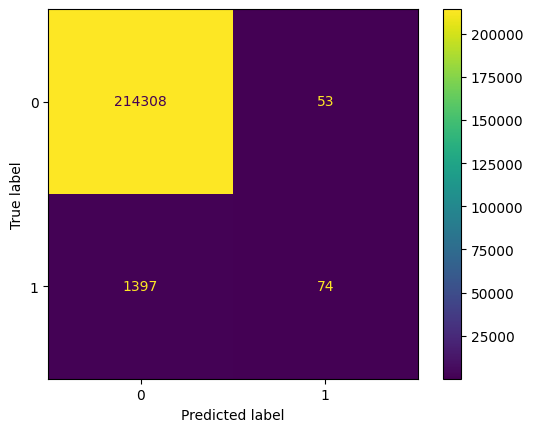

In [116]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

# 1 fraude (Positivo)
# 0 No fraude (Negativo)

## Arbol de decision

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import time

start = time.time()
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_res, y_train_res)
training_time = time.time() - start
print(f"Tiempo de entrenamiento de árbol con entropía es: {training_time:.4f} segundos")

predictions = clf.predict(X_test_bow)

Tiempo de entrenamiento de árbol con entropía es: 4.3320 segundos


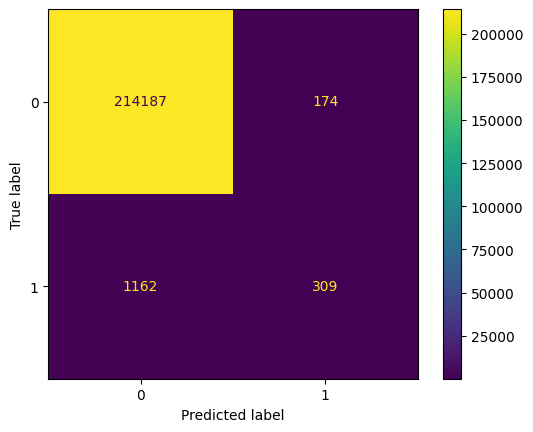

In [118]:
cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

## SVM

In [119]:
# from sklearn import svm

# start = time.time()
# clf = svm.SVC(kernel='linear')
# clf.fit(X_train_bow, y_train)
# training_time = time.time() - start
# print(f"Tiempo de entrenamiento de SVM es: {training_time:.4f} segundos")

# predictions = clf.predict(X_test_bow)

In [120]:
# cm = confusion_matrix(y_test, predictions)

# # plot the confusion matrix
# disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
# disp.plot()
# plt.show()

## Regresion Lineal

In [121]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time


start = time.time()

#clf = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train_res, y_train_res)
clf = LogisticRegression(max_iter=1000).fit(X_train_res, y_train_res)

training_time = time.time() - start
print(f"Tiempo de entrenamiento de regresión es: {training_time:.4f} segundos")

predictions = clf.predict(X_test_bow)

Tiempo de entrenamiento de regresión es: 3.5765 segundos


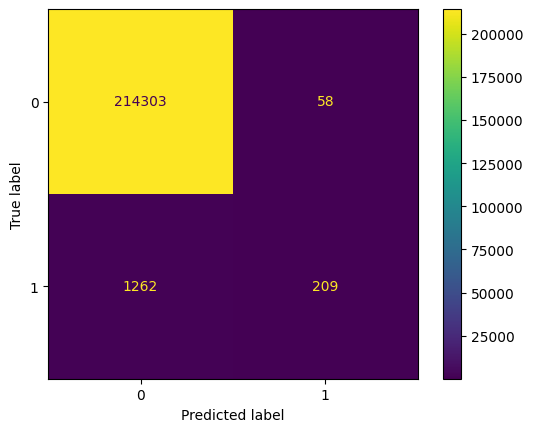

In [122]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Muestra la matriz de confusión
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()
